# Singular Value Decomposition (SVD)

[Singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) is another form of dimensionality reduction and matrix factorization similar to [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) as we've explored in previous lectures. 

Recall that the SVD of a matrix $A$ is:

$$A = UDV^{T}$$

where $U\in\mathbb{R^{mxm}}$ and $V\in\mathbb{R^{nxn}}$ are orthogonal matrices. The **singular values** of $D\in\mathbb{R^{mxn}}$ along its diagonals overall convey some measure of how big $A$ is. By manipulating the singular values of $D$, we can reconstruct the matrix $A$ from $U$, $V$, and $D$.

Utilizing SVD allows us to make *approximations* using a smaller representation of the original matrix; in turn, we can use this approximation in applications with images through image compression! 

Thus, in this blog post, we'll make use of SVD to *compress* images and analyze the effect of varying singular values of $k$ in assessing efficient storage use for large images on computers with minimal storage.

For my RGB image, I've chosen a scene from one of my favorite animes, [One Piece](https://en.wikipedia.org/wiki/One_Piece), with Luffy as the main character shown below.

![](https://media.tenor.com/TaCxCSmzlLEAAAAM/dream-fans-dsmp.gif)

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

In [8]:
url = "https://i.pinimg.com/550x/23/e4/e7/23e4e7aa8e7a9e2dbc75fece9d77fc99.jpg"

img = read_image(url)

First, I'll read my image using the `read_image` function which takes in an image url and converts the image as an np array. In doing so, we can represent the image in its RGB dimensions and convert the image to a greyscale image for SVD image compression.

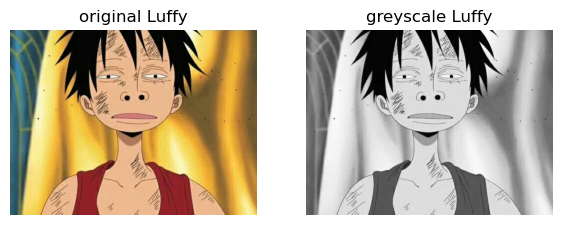

In [9]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original Luffy")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale Luffy")

plt.show()

## Implementation

Here is the source code for my function `svd_reconstruct`: [SVD](https://github.com/kennyerss/kennyerss.github.io/blob/main/posts/unsupervised/svd.py)

### Desired Compression Factor and Epsilon Threshold

In [10]:
# From lecture notes 
def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

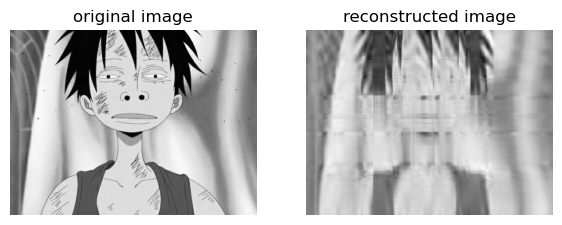

In [32]:
from svd import SVD

# Reconstruct our image
k = 10
grey_img_ = SVD.svd_reconstruct(grey_img, k)

# Compare images 
compare_images(grey_img, grey_img_)

## Experiment

In [ ]:
svd_experiment

#### Desired Compression Factor

#### Epsilon Threshold

# Experiments

## Varying k Singular Values 

### Calculating Total Storage for Compressed Image